# Bank Loan Approval Criteria Analysis - By team Outliers

**The dataset has been referred from Kaggle: https://www.kaggle.com/datasets/qusaybtoush1990/banks-loan .
The dataset is enormous with 148647 rows x 30 columns & consists of multiple deterministic factors like borrower's income, gender, loan purpose etc.The dataset is subject to strong multicollinearity & empty values.It consists of columns with different datatypes like float, integer, categorical, etc. The dataset is from 2019 and consists of approval status as well.**

**We know that banks have a certain set of factors to consider before approving a loan application. The 4 C's of the loan approval process are: Capacity, Capital, Collateral, Credit.
Our aim is to analyse how these 4 C's affect the loan amount approved.**

**The objectives to analyse the dataset are as follows:**
1. Analyse and Understand the dataset.
2. Fill empty values and remove unnecessary columns.
3. Find out factors based on which bank approves higher value loans.
4. Find out possible improvements in the dataset. 

In [56]:
'''importing necessary python libraries '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from sklearn. impute import KNNImputer
%matplotlib inline

In [3]:
'''Loading the dataset to perform further steps'''
data =pd.read_csv("Loan.csv")
print(data)

            ID  year loan_limit             Gender approv_in_adv loan_purpose  \
0        24913  2019         cf             Female         nopre           p3   
1        24914  2019         cf               Male         nopre           p3   
2        24915  2019        NaN              Joint         nopre           p3   
3        24916  2019         cf              Joint         nopre           p1   
4        24917  2019         cf  Sex Not Available         nopre           p4   
...        ...   ...        ...                ...           ...          ...   
148642  173555  2019         cf  Sex Not Available         nopre           p3   
148643  173556  2019         cf               Male         nopre           p1   
148644  173557  2019         cf               Male         nopre           p4   
148645  173558  2019         cf             Female         nopre           p4   
148646  173559  2019         cf             Female         nopre           p3   

       Credit_Worthiness op

In [4]:
data.head() #printing the first few rows

,ID,year,loan_limit,Gender,approv_in_adv,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,24913,2019,cf,Female,nopre,p3,l1,nopc,nob/c,316500,...,2760.0,CIB,620,CIB,65-74,62.303150,south,direct,0,44.0
1,24914,2019,cf,Male,nopre,p3,l2,nopc,nob/c,336500,...,4980.0,CIB,846,CIB,35-44,78.621495,south,direct,0,35.0
2,24915,2019,NaN,Joint,nopre,p3,l1,nopc,nob/c,426500,...,8940.0,EXP,533,EXP,45-54,75.088028,North,direct,0,34.0
3,24916,2019,cf,Joint,nopre,p1,l1,nopc,nob/c,476500,...,6780.0,EQUI,518,EXP,45-54,NaN,south,direct,1,NaN
4,24917,2019,cf,Sex Not Available,nopre,p4,l1,nopc,nob/c,196500,...,3840.0,EXP,812,EXP,25-34,76.162791,south,direct,0,49.0


In [5]:
data.info(verbose=True) #Finding the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148647 entries, 0 to 148646
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148647 non-null  int64  
 1   year                      148647 non-null  int64  
 2   loan_limit                145304 non-null  object 
 3   Gender                    148647 non-null  object 
 4   approv_in_adv             147739 non-null  object 
 5   loan_purpose              148513 non-null  object 
 6   Credit_Worthiness         148647 non-null  object 
 7   open_credit               148647 non-null  object 
 8   business_or_commercial    148647 non-null  object 
 9   loan_amount               148647 non-null  int64  
 10  rate_of_interest          112216 non-null  float64
 11  Interest_rate_spread      112016 non-null  float64
 12  Upfront_charges           109014 non-null  float64
 13  term                      148606 non-null  f

Finding Missing Values

In [6]:
data.isnull().sum()  #number of missing values in each column

ID                              0
year                            0
loan_limit                   3343
Gender                          0
approv_in_adv                 908
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest            36431
Interest_rate_spread        36631
Upfront_charges             39633
term                           41
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value              15097
Secured_by                      0
total_units                     0
income                       9149
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15097
Region                          0
Security_Type                   0
Status                          0
dtir1         

In [7]:
round(data.isnull().sum() / data.shape[0] * 100.00,2) #percentage of missing values in each column

ID                           0.00
year                         0.00
loan_limit                   2.25
Gender                       0.00
approv_in_adv                0.61
loan_purpose                 0.09
Credit_Worthiness            0.00
open_credit                  0.00
business_or_commercial       0.00
loan_amount                  0.00
rate_of_interest            24.51
Interest_rate_spread        24.64
Upfront_charges             26.66
term                         0.03
Neg_ammortization            0.08
interest_only                0.00
lump_sum_payment             0.00
property_value              10.16
Secured_by                   0.00
total_units                  0.00
income                       6.15
credit_type                  0.00
Credit_Score                 0.00
co-applicant_credit_type     0.00
age                          0.13
LTV                         10.16
Region                       0.00
Security_Type                0.00
Status                       0.00
dtir1         

In [8]:
print(data['year'].unique())

[2019]


# - Removing unnecessary columns and imputing missing values using statistical methods - mean and median - for numerical values and mode for categorical values

**Now that we have an overview of the dataset, we move on to cleaning the dataset. It involves finding the number of missing values present in each column. In this section, we will also analyse and pick out columns we do not require for the purpose of our analysis. We can delete these redundant columns.**

**Since the data is from 2019, the whole year column has only one value. It does not contribute much to our objective and hence, can be deleted. Similarly, since our focus is to determine and understand factors on which loan amount approval is based, we do not require the columns that give information on procedures that take place after a particular loan has been approved. Hence, we can delete this columns as well.**

In [9]:
'''using "del" to delete all the redundant columns'''

del data['year']
del data['loan_limit']
del data['Interest_rate_spread']
del data['interest_only']
del data['co-applicant_credit_type']
del data['open_credit']
del data['Upfront_charges']
data

,ID,Gender,approv_in_adv,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,term,Neg_ammortization,...,total_units,income,credit_type,Credit_Score,age,LTV,Region,Security_Type,Status,dtir1
0,24913,Female,nopre,p3,l1,nob/c,316500,3.625,360.0,not_neg,...,1U,2760.0,CIB,620,65-74,62.303150,south,direct,0,44.0
1,24914,Male,nopre,p3,l2,nob/c,336500,4.500,360.0,not_neg,...,1U,4980.0,CIB,846,35-44,78.621495,south,direct,0,35.0
2,24915,Joint,nopre,p3,l1,nob/c,426500,4.990,360.0,not_neg,...,1U,8940.0,EXP,533,45-54,75.088028,North,direct,0,34.0
3,24916,Joint,nopre,p1,l1,nob/c,476500,NaN,360.0,not_neg,...,1U,6780.0,EQUI,518,45-54,NaN,south,direct,1,NaN
4,24917,Sex Not Available,nopre,p4,l1,nob/c,196500,5.250,360.0,not_neg,...,1U,3840.0,EXP,812,25-34,76.162791,south,direct,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148642,173555,Sex Not Available,nopre,p3,l1,nob/c,436500,3.125,180.0,not_neg,...,1U,7860.0,CIB,659,55-64,71.792763,south,direct,0,48.0
148643,173556,Male,nopre,p1,l1,nob/c,586500,5.190,360.0,not_neg,...,4U,7140.0,CIB,569,25-34,74.428934,south,direct,0,15.0
148644,173557,Male,nopre,p4,l1,nob/c,446500,3.125,180.0,not_neg,...,1U,6900.0,CIB,702,45-54,61.332418,North,direct,0,49.0
148645,173558,Female,nopre,p4,l1,nob/c,196500,3.500,180.0,not_neg,...,1U,7140.0,EXP,737,55-64,70.683453,North,direct,0,29.0


In [10]:
round(data.isnull().sum() / data.shape[0] * 100.00,2)

ID                         0.00
Gender                     0.00
approv_in_adv              0.61
loan_purpose               0.09
Credit_Worthiness          0.00
business_or_commercial     0.00
loan_amount                0.00
rate_of_interest          24.51
term                       0.03
Neg_ammortization          0.08
lump_sum_payment           0.00
property_value            10.16
Secured_by                 0.00
total_units                0.00
income                     6.15
credit_type                0.00
Credit_Score               0.00
age                        0.13
LTV                       10.16
Region                     0.00
Security_Type              0.00
Status                     0.00
dtir1                     16.23
dtype: float64

In [11]:
del data['approv_in_adv']
data

,ID,Gender,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,term,Neg_ammortization,lump_sum_payment,...,total_units,income,credit_type,Credit_Score,age,LTV,Region,Security_Type,Status,dtir1
0,24913,Female,p3,l1,nob/c,316500,3.625,360.0,not_neg,not_lpsm,...,1U,2760.0,CIB,620,65-74,62.303150,south,direct,0,44.0
1,24914,Male,p3,l2,nob/c,336500,4.500,360.0,not_neg,not_lpsm,...,1U,4980.0,CIB,846,35-44,78.621495,south,direct,0,35.0
2,24915,Joint,p3,l1,nob/c,426500,4.990,360.0,not_neg,not_lpsm,...,1U,8940.0,EXP,533,45-54,75.088028,North,direct,0,34.0
3,24916,Joint,p1,l1,nob/c,476500,NaN,360.0,not_neg,not_lpsm,...,1U,6780.0,EQUI,518,45-54,NaN,south,direct,1,NaN
4,24917,Sex Not Available,p4,l1,nob/c,196500,5.250,360.0,not_neg,not_lpsm,...,1U,3840.0,EXP,812,25-34,76.162791,south,direct,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148642,173555,Sex Not Available,p3,l1,nob/c,436500,3.125,180.0,not_neg,not_lpsm,...,1U,7860.0,CIB,659,55-64,71.792763,south,direct,0,48.0
148643,173556,Male,p1,l1,nob/c,586500,5.190,360.0,not_neg,not_lpsm,...,4U,7140.0,CIB,569,25-34,74.428934,south,direct,0,15.0
148644,173557,Male,p4,l1,nob/c,446500,3.125,180.0,not_neg,not_lpsm,...,1U,6900.0,CIB,702,45-54,61.332418,North,direct,0,49.0
148645,173558,Female,p4,l1,nob/c,196500,3.500,180.0,not_neg,not_lpsm,...,1U,7140.0,EXP,737,55-64,70.683453,North,direct,0,29.0


In [12]:
data.isnull().sum().sum()/data.size * 100

3.0697803276462787

**After dropping the unnecessary columns, since the dataset is enormous, the missing values percentage is very low but for better results, we will fill the missing values using mean or median for numerical values and mode for categorical values. We will use mode for loan_purpose and age columns since they are categorical values.We will use median for rate_of_interest,property_value and dtir since median will give us the closest to accurate answer to fill in the value. We will use mean for income.**

In [13]:
print("Mode - " + str(data.loan_purpose.mode()))

Mode - 0    p3
dtype: object


In [14]:
data.loan_purpose.fillna(data.loan_purpose.mode()[0], inplace=True)

In [15]:
print("Median - " + str(data.rate_of_interest.median()))

Median - 3.99


In [16]:
data.rate_of_interest.fillna(data.rate_of_interest.median(), inplace=True)

In [17]:
round(data.isnull().sum() / data.shape[0] * 100.00,2)

ID                         0.00
Gender                     0.00
loan_purpose               0.00
Credit_Worthiness          0.00
business_or_commercial     0.00
loan_amount                0.00
rate_of_interest           0.00
term                       0.03
Neg_ammortization          0.08
lump_sum_payment           0.00
property_value            10.16
Secured_by                 0.00
total_units                0.00
income                     6.15
credit_type                0.00
Credit_Score               0.00
age                        0.13
LTV                       10.16
Region                     0.00
Security_Type              0.00
Status                     0.00
dtir1                     16.23
dtype: float64

In [18]:
print("Median - " + str(data.property_value.median()))

Median - 418000.0


In [19]:
data.property_value.fillna(data.property_value.median(), inplace=True)

In [20]:
print("Mean - " + str(data.income.mean()))

Mean - 6957.394371245466


In [21]:
data.income.fillna(data.income.mean(), inplace=True)

In [22]:
print("Mode - " + str(data.age.mode()[0]))

Mode - 45-54


In [23]:
data.age.fillna(data.age.mode()[0], inplace=True)

In [24]:
print("Median - " + str(data.dtir1.median()))

Median - 39.0


In [25]:
data.dtir1.fillna(data.dtir1.median(), inplace=True)

In [26]:
data.LTV.median()
data.LTV.fillna(data.LTV.median(), inplace=True)

In [27]:
round(data.isnull().sum() / data.shape[0] * 100.00,2)

ID                        0.00
Gender                    0.00
loan_purpose              0.00
Credit_Worthiness         0.00
business_or_commercial    0.00
loan_amount               0.00
rate_of_interest          0.00
term                      0.03
Neg_ammortization         0.08
lump_sum_payment          0.00
property_value            0.00
Secured_by                0.00
total_units               0.00
income                    0.00
credit_type               0.00
Credit_Score              0.00
age                       0.00
LTV                       0.00
Region                    0.00
Security_Type             0.00
Status                    0.00
dtir1                     0.00
dtype: float64

**Now that we have filled up most of our missing values, we can move on with our analysis.**

**To understand which region has most number of people applying for loans, we visualise it through a pie chart. 
The pie chart gives a brief overview of the distribution of the customers throughout the north, south, central and north-eastern regions.**

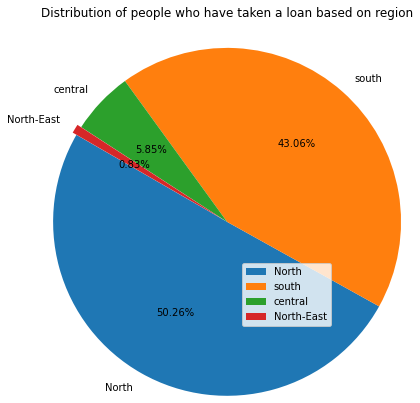

In [28]:
#pie chart

newregiondata = data['Region'].value_counts().rename_axis('Regions').reset_index(name='Counts') #getting regions and counts

mylabels=newregiondata.Regions #assigning labels and values for plotting pie chart
myvalues=newregiondata.Counts
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"] #defining colors
plt.pie(myvalues, labels=mylabels, explode = (0, 0, 0, 0.05), colors=colors, startangle=150, radius = 2, autopct = '%2.2f%%')
plt.title("Distribution of people who have taken a loan based on region\n\n\n\n\n\n") #title
plt.legend(loc='lower right') #legend

plt.show() #show chart

**From the pie chart, we can conclude that 50% of the people from the dataset belong to the northern region. South has 43%. Northern and Southern regions are the ones with the maximum number of borrowers.**

**We will now try to understand if the age and gender of the customer play a role in the amount of loan approved. We will analyse this through a boxplot, to understand how the age values in the dataset are spread out.**

Box Plot

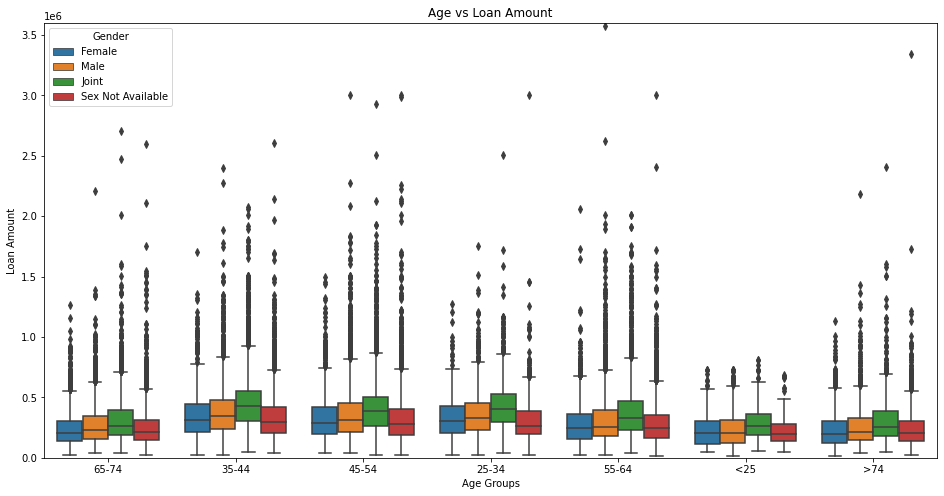

In [29]:
ax = plt.figure(figsize=(16,8)) #adjusting the size of the figure
ax=sns.boxplot(data=data, x = data['age'], y = data['loan_amount'],hue='Gender') # calling the box plot function by passing x and y axis from the dataset
ax.set(ylim=(0,3600000)) #setting the y-axis range
plt.title('Age vs Loan Amount')  #defining the tile
plt.xlabel('Age Groups') #Giving the  name of X-axis
plt.ylabel('Loan Amount') #Giving the  name of y-axis
plt.show()

**The boxplot above is difficult to understand and does not give much information because of the huge number of outliers. To avoid this challenge, we will ignore the outliers and set a limit to the boxplot.**

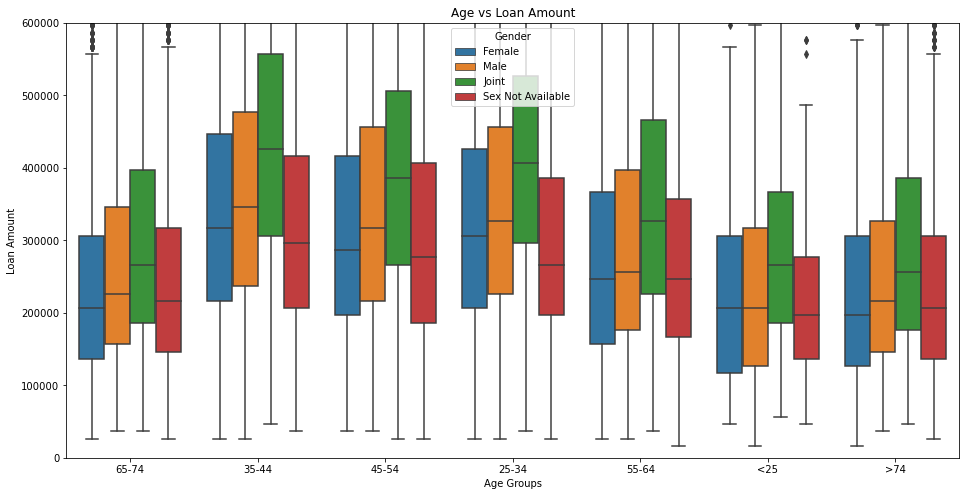

In [30]:
ax = plt.figure(figsize=(16,8)) #adjusting the size of the figure
ax=sns.boxplot(data=data, x = data['age'], y = data['loan_amount'],hue='Gender') # calling the box plot function by passing x and y axis from the dataset columns
ax.set(ylim=(0,600000)) #setting the y-axis range
plt.title('Age vs Loan Amount') #defining the tile
plt.xlabel('Age Groups') #Giving the  name of X-axis
plt.ylabel('Loan Amount') #Giving the name of y axis
plt.show()

**Apart from Male and Female, the Gender column has a "Joint" value as well. The "Joint" signifies a "Joint" account and can be a male-male, female-male, female-female account. The "Sex Not Available" values in the Gender column can be treated as missing values. We can replace it with the mode of the Gender column and see if it makes any changes to our boxplot.**

In [31]:
'''Replacing Gender column's missing values(Sex Not Available fields) with its mode value which is Male'''

data['Gender'] = data['Gender'].replace({'Sex Not Available': 'Male'})
print(data['Gender'])

0         Female
1           Male
2          Joint
3          Joint
4           Male
           ...  
148642      Male
148643      Male
148644      Male
148645    Female
148646    Female
Name: Gender, Length: 148647, dtype: object


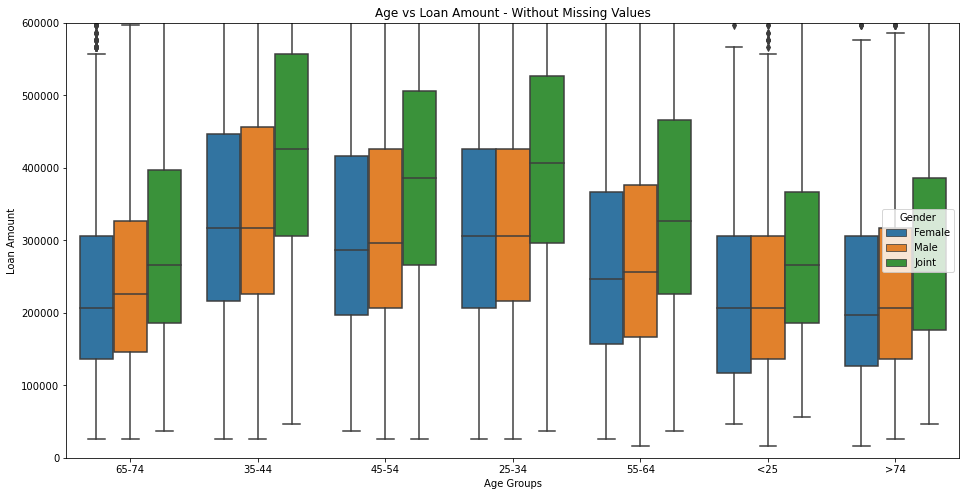

In [32]:
ax = plt.figure(figsize=(16,8)) #adjusting the size of the figure
ax=sns.boxplot(data=data, x = data['age'], y = data['loan_amount'],hue='Gender') # calling the box plot function by passing x and y axis from the dataset
ax.set(ylim=(0,600000)) #setting the y-axis range
plt.title('Age vs Loan Amount - Without Missing Values') #defining the tile
plt.xlabel('Age Groups') #Giving the  name of X-axis
plt.ylabel('Loan Amount') #Giving the  name of Y-axis
plt.show()

**From the boxplot we can infer that the age groups 25-54 have a higher probability of getting approvals for loans with higher values. It can be seen that males are leading in all age groups, but since the dataset does not clarify what "joint" is and gives more background information about the customers, we will have to work forward based on our assumptions.**

In [33]:
print(data['loan_purpose'].unique())

['p3' 'p1' 'p4' 'p2']


**The dataset provides 4 loan purposes: p1, p2, p3, p4. It does not give more details on what the purpose is specifically. Sometimes, the purpose of the loan can also influence the amount santioned. We will now try to check which is the loan purpose with the highest loan amount.**

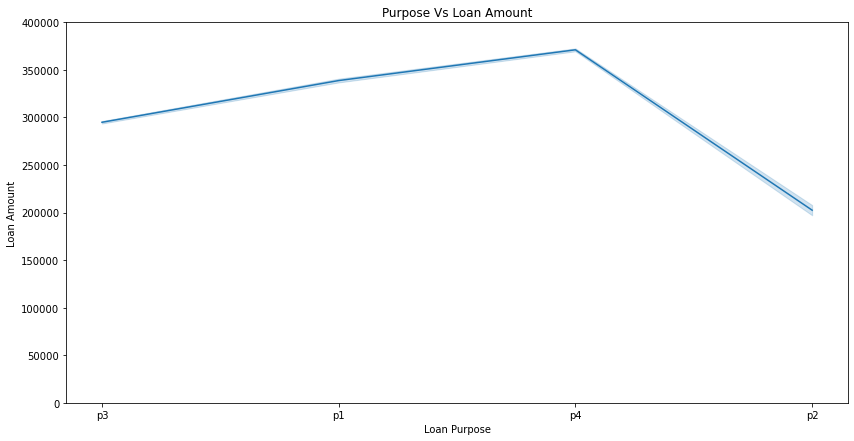

In [34]:
ax = plt.figure(figsize=(14,7)) #adjusting the size of the figure
ax = sns.lineplot(x="loan_purpose", y="loan_amount",data=data) # calling the line graph function by passing x and y axis from the dataset
ax.set_ylim(0,400000) #setting the y-axis range
plt.title('Purpose Vs Loan Amount') #defining the tile
plt.xlabel('Loan Purpose') #Giving the  name of X-axis
plt.ylabel('Loan Amount') #Giving the  name of Y-axis
plt.show()

**Loan purpose p4 has the highest loan amount, followed by p1, then p3 and lastly p2. We require more information to reach further conclusions.**

**In our dataset, we have information on whether the loan application was made for business or commercial purposes.Using that, we can try to understand the impact of purpose on loan amount sanctioned better.**

Bar Chart

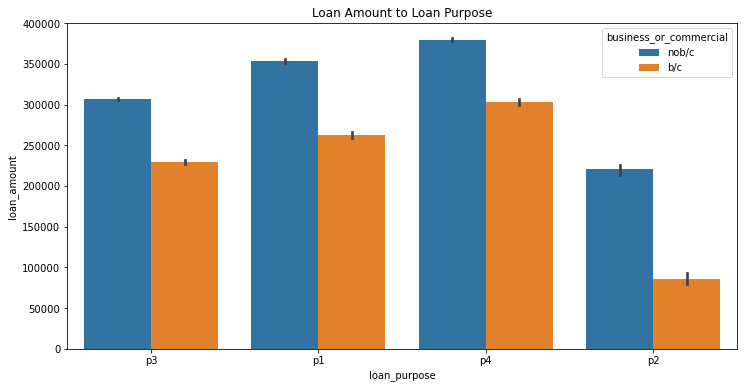

In [36]:
fig = plt.subplots(figsize=(12,6))  #figure size
plt.title("Loan Amount to Loan Purpose") #barchart title

sns.barplot(x = 'loan_purpose',    #setting x and y axis parameters
            y = 'loan_amount',
            hue = 'business_or_commercial',
            data = data)
 
# Show the plot
plt.show()

**We can see that loans for business or commercial purposes are the ones with comparatively lower amounts.**

**The next factor provided in the dataset is dtir. Dtir is the debt-to-income ratio which tells the bank or loan provider about your current debt status. It is one of the most important factors loan providers consider while approving loans.**

Bar Chart - 2

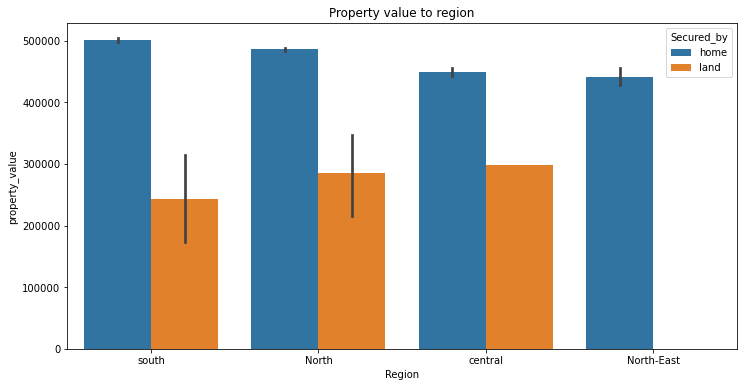

In [42]:
fig = plt.subplots(figsize=(12,6))  #figure size
plt.title("Property value to region") #barchart title

sns.barplot(x = 'Region',    #setting x and y axis parameters
            y = 'property_value',
            hue = 'Secured_by',
            data = data)
 
# Show the plot
plt.show()

**Having a collateral also plays an important role. The value and type of collateral can also determine the loan value. We will view the property value distribution and type of collateral based on region provided in the dataset through barcharts.**

**We can observe that mostly home is used as collateral. The property value is higher in the northern and southern regions thus inferring that higher loan amounts can be approved depending on other factors.**

Histogram

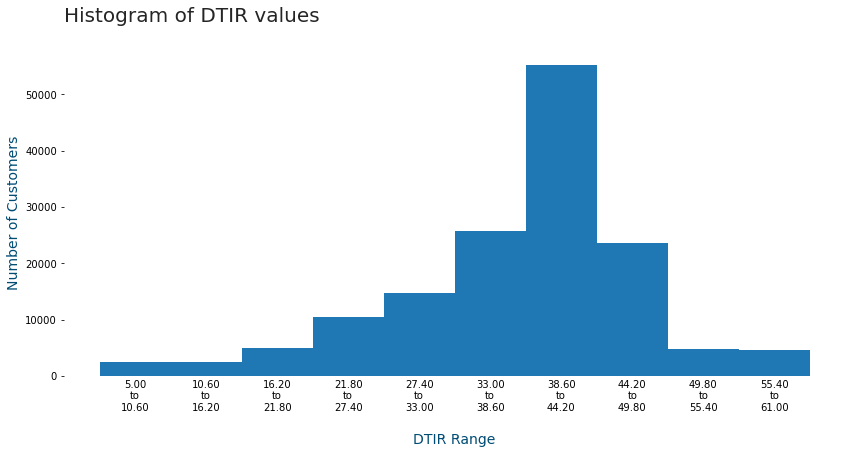

In [37]:
txt_color1 = '#252525'
txt_color2 = '#004C74'

fig, ax = plt.subplots(1,figsize=(14,6))
n, bins, patches = plt.hist(data.dtir1)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)


# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Histogram of DTIR values\n', loc = 'left', fontsize = 20, c=txt_color1)
plt.xlabel('\nDTIR Range', c=txt_color2, fontsize=14)
plt.ylabel('Number of Customers', c=txt_color2, fontsize=14)

plt.show()

**The above histogram provides the frequency of DTIR range values. 43% and below is considered as a good dtir. It can be observed that more than 50% of the dataset has a dtir below 43%.**

**Next, we will consider the role income plays in the amount of loan. We will visualize this through a scatter plot to show distribution of income and loan amount.**

Scatter Plot

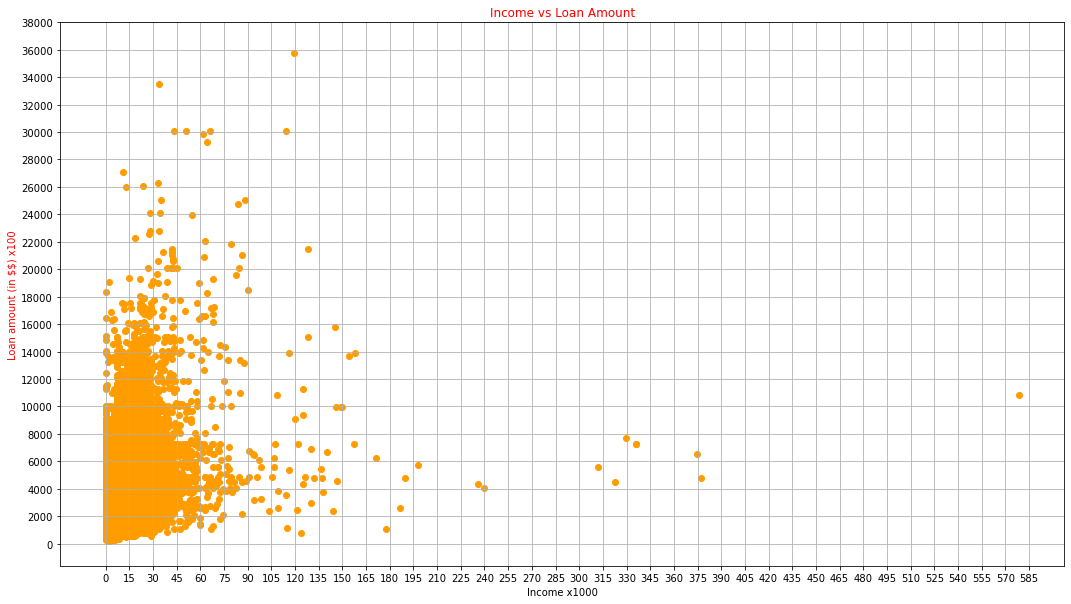

In [40]:
# x-axis values
inc = data['income']
inc=inc/1000 #scaling the income values

# y-axis values
amount= data['loan_amount']
amount=amount/100 #scaling the amount values

# plotting points as a scatter plot
plt.figure(figsize=(18,10)) #resizing the scatterplot
plt.scatter(inc, amount, color= '#ff9c00')

plt.xticks( range(0,600,15) )   # Put x axis ticks every 15 units.
plt.yticks( range(0,40000,2000) )  # Y ticks every 200 units.

# x-axis label
plt.xlabel('Income x1000')
# frequency label
plt.ylabel('Loan amount (in \$\$) x100', color='red')
# plot title
plt.title('Income vs Loan Amount', color='red')
plt.grid(True) #displays a grid

# function to show the plot
plt.show()

**From the above scatter plot, we can infer that - the cluster is in between 0 to 90000 and hence we can conclude that as the income increases, the loan amount is decreased which mean that the number of people who took the loan dimiishes with increasing income.**

In [43]:
data.Credit_Score.min()

500

**The loan amount to property value relationship is given below using a scatterplot.**

In [44]:
data.Credit_Score.max()

900

**One extremely important factor for loan approvals is the credit score. The credit score ranges from 500-900 in the dataset. Higher the credit score, higher the chances of getting a loan approved, provided other factors add up.The credit score distribution of customers belonging to different age groups can be studied using heatmaps.**

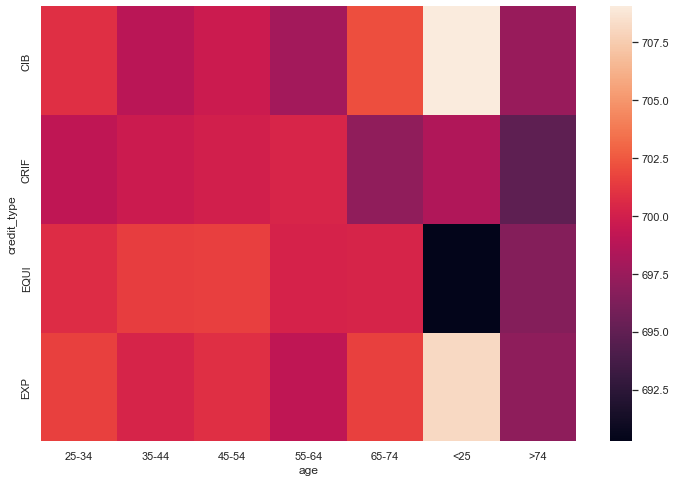

In [45]:
data_heatmap = data.pivot_table(values = "Credit_Score", index = 'credit_type', columns = "age")

sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data_heatmap, annot = False)
plt.show()

**It can be observed that younger age group customers tend to have better credit scores. Not much background is given about the employment or other credit history of the customer in the dataset, thus limiting our findings to credit score only.**

# **The below visualizations depict without imputations.**

Reading the dataset again and storing it as new object

In [101]:
'''Loading the dataset to perform further steps'''
data1 =pd.read_csv("Loan.csv")
print(data1)

            ID  year loan_limit             Gender approv_in_adv loan_purpose  \
0        24913  2019         cf             Female         nopre           p3   
1        24914  2019         cf               Male         nopre           p3   
2        24915  2019        NaN              Joint         nopre           p3   
3        24916  2019         cf              Joint         nopre           p1   
4        24917  2019         cf  Sex Not Available         nopre           p4   
...        ...   ...        ...                ...           ...          ...   
148642  173555  2019         cf  Sex Not Available         nopre           p3   
148643  173556  2019         cf               Male         nopre           p1   
148644  173557  2019         cf               Male         nopre           p4   
148645  173558  2019         cf             Female         nopre           p4   
148646  173559  2019         cf             Female         nopre           p3   

       Credit_Worthiness op

##Deleting all the unnecessary columns##

In [102]:
'''using "del" to delete all the redundant columns'''

del data1['year']
del data1['loan_limit']
del data1['Interest_rate_spread']
del data1['interest_only']
del data1['co-applicant_credit_type']
del data1['open_credit']
del data1['Upfront_charges']
data1

,ID,Gender,approv_in_adv,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,term,Neg_ammortization,...,total_units,income,credit_type,Credit_Score,age,LTV,Region,Security_Type,Status,dtir1
0,24913,Female,nopre,p3,l1,nob/c,316500,3.625,360.0,not_neg,...,1U,2760.0,CIB,620,65-74,62.303150,south,direct,0,44.0
1,24914,Male,nopre,p3,l2,nob/c,336500,4.500,360.0,not_neg,...,1U,4980.0,CIB,846,35-44,78.621495,south,direct,0,35.0
2,24915,Joint,nopre,p3,l1,nob/c,426500,4.990,360.0,not_neg,...,1U,8940.0,EXP,533,45-54,75.088028,North,direct,0,34.0
3,24916,Joint,nopre,p1,l1,nob/c,476500,NaN,360.0,not_neg,...,1U,6780.0,EQUI,518,45-54,NaN,south,direct,1,NaN
4,24917,Sex Not Available,nopre,p4,l1,nob/c,196500,5.250,360.0,not_neg,...,1U,3840.0,EXP,812,25-34,76.162791,south,direct,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148642,173555,Sex Not Available,nopre,p3,l1,nob/c,436500,3.125,180.0,not_neg,...,1U,7860.0,CIB,659,55-64,71.792763,south,direct,0,48.0
148643,173556,Male,nopre,p1,l1,nob/c,586500,5.190,360.0,not_neg,...,4U,7140.0,CIB,569,25-34,74.428934,south,direct,0,15.0
148644,173557,Male,nopre,p4,l1,nob/c,446500,3.125,180.0,not_neg,...,1U,6900.0,CIB,702,45-54,61.332418,North,direct,0,49.0
148645,173558,Female,nopre,p4,l1,nob/c,196500,3.500,180.0,not_neg,...,1U,7140.0,EXP,737,55-64,70.683453,North,direct,0,29.0


**We are now taking all the numerical columns and filling the missing values using KNN Imputation**

In [103]:
impute_column = pd.DataFrame(data ,columns = ['property_value','rate_of_interest','income','dtir1'])
impute_column

,property_value,rate_of_interest,income,dtir1
0,508000.0,3.625,2760.0,44.0
1,428000.0,4.500,4980.0,35.0
2,568000.0,4.990,8940.0,34.0
3,418000.0,3.990,6780.0,39.0
4,258000.0,5.250,3840.0,49.0
...,...,...,...,...
148642,608000.0,3.125,7860.0,48.0
148643,788000.0,5.190,7140.0,15.0
148644,728000.0,3.125,6900.0,49.0
148645,278000.0,3.500,7140.0,29.0


In [104]:
imputer = KNNImputer(n_neighbors=2)
after_imputation = imputer.fit_transform(impute_column) 
after_imputation

array([[5.080e+05, 3.625e+00, 2.760e+03, 4.400e+01],
       [4.280e+05, 4.500e+00, 4.980e+03, 3.500e+01],
       [5.680e+05, 4.990e+00, 8.940e+03, 3.400e+01],
       ...,
       [7.280e+05, 3.125e+00, 6.900e+03, 4.900e+01],
       [2.780e+05, 3.500e+00, 7.140e+03, 2.900e+01],
       [5.580e+05, 4.375e+00, 7.260e+03, 4.400e+01]])

In [105]:
impute_column = pd.DataFrame(after_imputation ,columns = ['property_value','rate_of_interest','income','dtir1']) 
#filled all the missing values for the mentioned columns using KNN imputator
impute_column 


,property_value,rate_of_interest,income,dtir1
0,508000.0,3.625,2760.0,44.0
1,428000.0,4.500,4980.0,35.0
2,568000.0,4.990,8940.0,34.0
3,418000.0,3.990,6780.0,39.0
4,258000.0,5.250,3840.0,49.0
...,...,...,...,...
148642,608000.0,3.125,7860.0,48.0
148643,788000.0,5.190,7140.0,15.0
148644,728000.0,3.125,6900.0,49.0
148645,278000.0,3.500,7140.0,29.0


In [106]:
impute_column.isnull().sum() #checking the null values for the columns

property_value      0
rate_of_interest    0
income              0
dtir1               0
dtype: int64

In [107]:
'''Assigning the values to the columns of our data set'''
data1['property_value'] = impute_column['property_value']
data1['rate_of_interest'] = impute_column['rate_of_interest']
data1['income'] = impute_column['income']
data1['dtir1'] = impute_column['dtir1']

In [108]:
data1.isnull().sum() #checking missing values for these columns from our data set

ID                            0
Gender                        0
approv_in_adv               908
loan_purpose                134
Credit_Worthiness             0
business_or_commercial        0
loan_amount                   0
rate_of_interest              0
term                         41
Neg_ammortization           121
lump_sum_payment              0
property_value                0
Secured_by                    0
total_units                   0
income                        0
credit_type                   0
Credit_Score                  0
age                         200
LTV                       15097
Region                        0
Security_Type                 0
Status                        0
dtir1                         0
dtype: int64

This is part 4-b

***Bar Chart with imputation - Region Vs Property Value***  

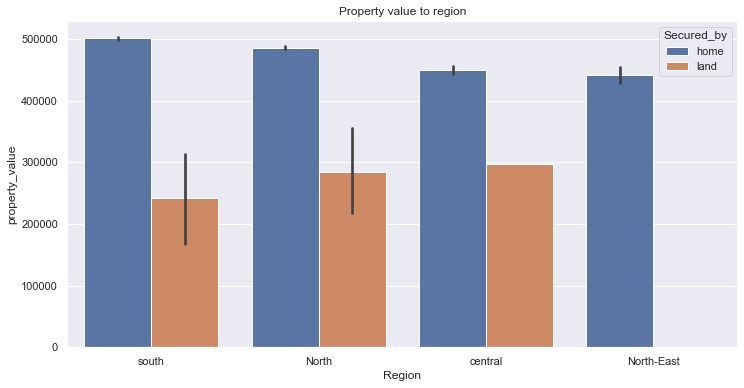

In [98]:
fig = plt.subplots(figsize=(12,6))  #figure size
plt.title("Property value to region") #barchart title

sns.barplot(x = 'Region',    #setting x and y axis parameters
            y = 'property_value',
            hue = 'Secured_by',
            data = data1)
 
# Show the plot
plt.show()

***Histogram of DTIR - Debt-to Income Ratio values***

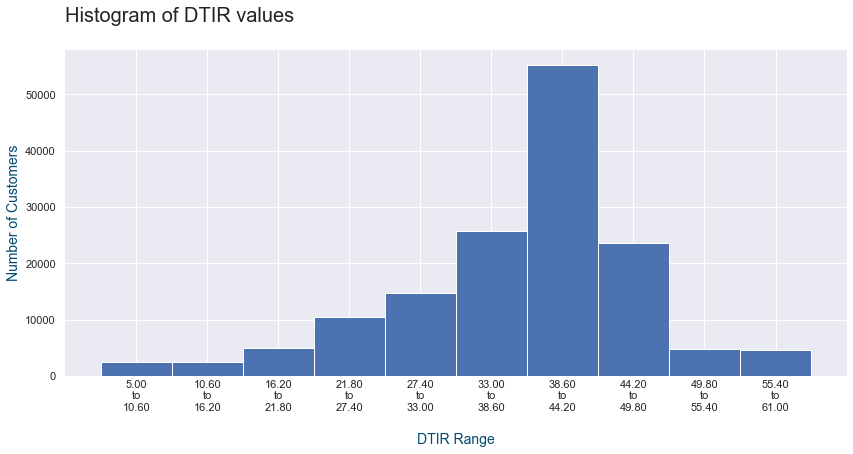

In [109]:
txt_color1 = '#252525'
txt_color2 = '#004C74'

fig, ax = plt.subplots(1,figsize=(14,6))
n, bins, patches = plt.hist(data1.dtir1)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)


# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Histogram of DTIR values\n', loc = 'left', fontsize = 20, c=txt_color1)
plt.xlabel('\nDTIR Range', c=txt_color2, fontsize=14)
plt.ylabel('Number of Customers', c=txt_color2, fontsize=14)

plt.show()

In [ ]:
xPoints = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y1Points = np.array([12, 14, 16, 18, 10, 12, 14, 16, 18, 120])
y2Points = np.array([12, 7, 6, 5, 4, 3, 2, 2, 1, 12])

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(xPoints, y1Points)
plt.title("Before Imputation")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.plot(xPoints, y2Points)
plt.title("After Imputation")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.show()

# Conclusion:
**Overall, it can be concluded that higher loan amount can be approved if a customer dtir below 43%, credit score more than 500, a collateral with good property value and higher income.**

# Recommendation:

1. The analysis can be more thorough and accurate if the dataset also involves the exact loan purpose.
2. More information about the income and employment background of the customers.
3. More information about the gender of the customers and clarification on joint accounts.